<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [2]:
data = pd.read_csv('./train.csv', na_values=' ')

In [3]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

#Сделаем копию категориальных признаков для catboost
cat_cols2 = cat_cols

In [4]:
# YOUR CODE
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


Посмотрим на случайные строчки.

In [5]:
data.sample(7)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1705,1,45.10,45.10,Female,1,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,1
1339,68,76.75,5233.25,Male,0,No,No,Yes,Yes,DSL,Yes,Yes,Yes,No,No,Yes,One year,No,Credit card (automatic),0
4183,28,104.80,3046.05,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1
4830,72,80.20,5714.20,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),0
4030,67,87.40,5918.80,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,One year,No,Electronic check,1
5274,2,69.75,144.55,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),1
1643,46,108.90,4854.30,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


Посмотрим, есть ли в датасете незаполненные данные

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Видим, что в колонке TotalSpent 5273 non-null значения, в других колонках пропусков нет. Давайте проверим, так ли это:

In [7]:
data.columns[data.isna().any()].tolist()

['TotalSpent']

NaN есть только в колонке TotalSpent.
Построим табличку с количеством nan в каждой колонке:

In [8]:
cols = feature_cols + target_col.split()
num_nan = list()
for elem in cols:
    num_nan.append(data[elem].isnull().sum(axis=0))

pd.DataFrame(list(zip(cols, num_nan )), columns = ['Columns', 'NaN count'])

,Columns,NaN count
0,ClientPeriod,0
1,MonthlySpending,0
2,TotalSpent,9
3,Sex,0
4,IsSeniorCitizen,0
5,HasPartner,0
6,HasChild,0
7,HasPhoneService,0
8,HasMultiplePhoneNumbers,0
9,HasInternetService,0


Из таблицы видим, что nan у TotalSpent всего 9.
Приведём все значения столбца TotalSpent к типу float и заменим nan на медианное значение этого столбца.

In [9]:
data['TotalSpent'].astype('float')
data['TotalSpent'] = data['TotalSpent'].fillna(data['TotalSpent'].median())

Убедимся, что пропуски отсутствуют (если в данных есть пропуски, выдаст ошибку):

In [10]:
assert not data.isnull().values.any()

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

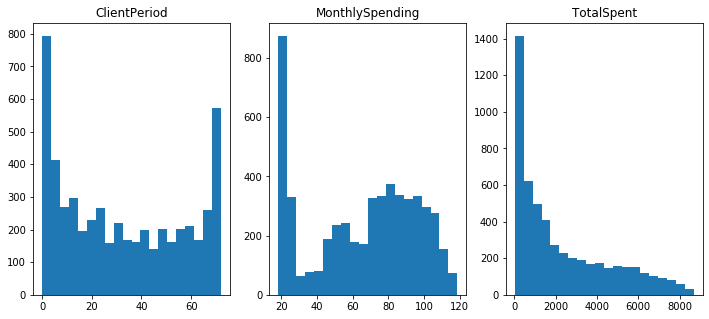

In [11]:
# YOUR CODE

#Для числовых признаков построим гистограмму

num_bins = 20

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

axs[0].hist(data['ClientPeriod'], num_bins, stacked=True, density=False)
axs[0].set_title('ClientPeriod')
axs[1].hist(data['MonthlySpending'], num_bins, stacked=True, density=False)
axs[1].set_title('MonthlySpending')
axs[2].hist(data['TotalSpent'], num_bins, stacked=True, density=False)
axs[2].set_title('TotalSpent')

None

Для категориальных признаков построим pie диаграммы

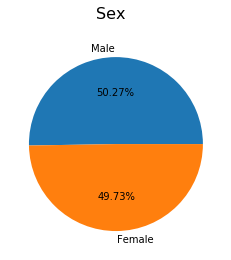

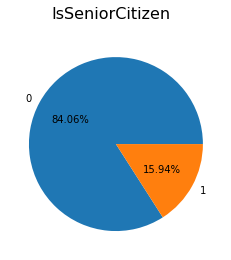

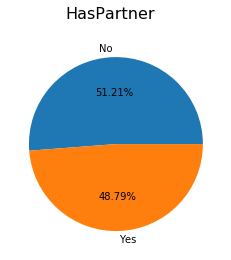

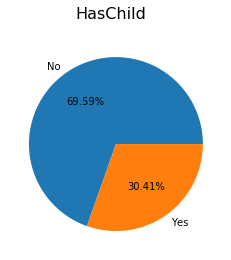

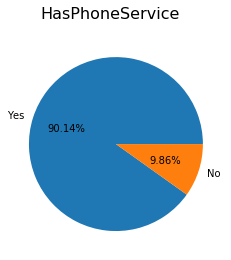

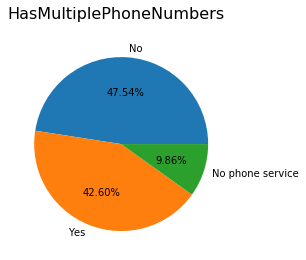

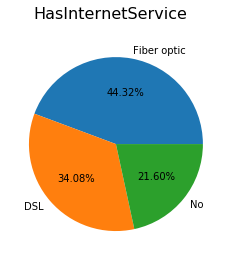

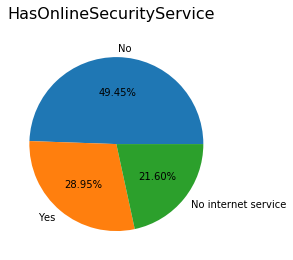

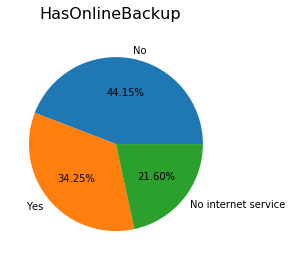

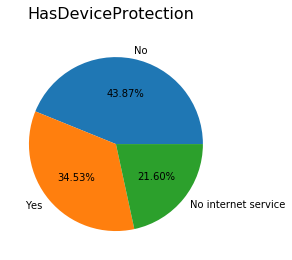

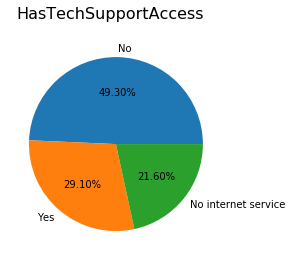

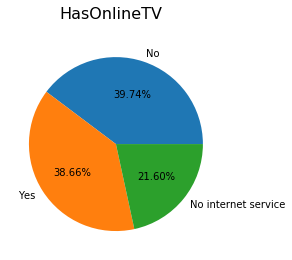

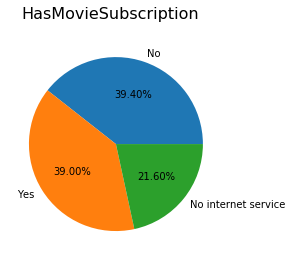

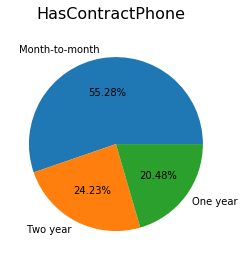

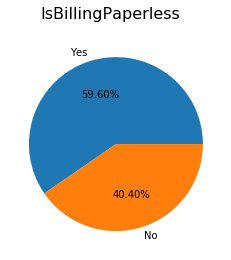

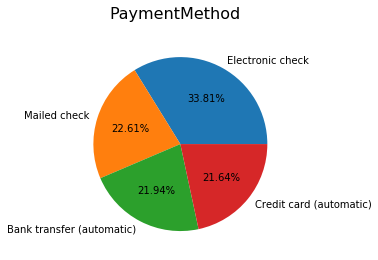

In [12]:
for elem in cat_cols:
    fig, ax1 = plt.subplots()
    fig.suptitle(elem, fontsize=16)
    
    current_data = data[elem].value_counts().reset_index()
    
    ax1.pie(current_data[elem], labels=current_data['index'], autopct='%1.2f%%')

Посмотрим на распределение целевой переменной

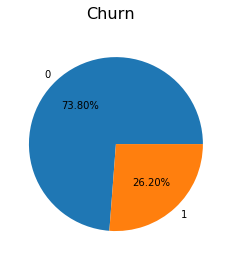

In [13]:
    fig, ax1 = plt.subplots()
    fig.suptitle(target_col, fontsize=16)
    
    current_data = data[target_col].value_counts().reset_index()
    
    ax1.pie(current_data[target_col], labels=current_data['index'], autopct='%1.2f%%')
    
    None

Видим, что классы не сбалансированы

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [14]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [15]:
# YOUR CODE

X_origin = data.iloc[:, :-1]
#Сгенерируем One-hot признаки для нашего датасета.
data = pd.get_dummies(data, columns = cat_cols)

cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
cat_cols = cat_cols_new
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Churn,Sex_Female,Sex_Male,IsSeniorCitizen_0,IsSeniorCitizen_1,HasPartner_No,HasPartner_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,0,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,1,0,0,1,...,1,0,0,1,1,0,0,1,0,0


In [16]:
#Отнормируем числовые признаки. Сохраним полную матрицу "объекты-признаки" в переменную X.
pca = StandardScaler()
X = pca.fit_transform(data[num_cols + cat_cols])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], test_size=0.2, random_state=42)

clf = LogisticRegressionCV(cv=5, scoring='roc_auc', n_jobs=-1, refit=True)
clf.fit(X_train, y_train)
print(clf.score(X, data[target_col]))
print(clf.C_)

0.8484155762403723
[21.5443469]


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

*Лучшее качество получилось 0.8484155762403723, значение параметра равно 21.5443469*

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [32]:
# YOUR CODE
#!pip install catboost
from sklearn.metrics import roc_auc_score
import catboost

X_train_origin, X_test_origin, _, _ = train_test_split(X_origin, data[target_col], 
                                                       train_size=0.8, 
                                                       random_state=42)

boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                             cat_features=cat_cols2)

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

print('train AUC={:.4f}'.format(train_auc))
print('test AUC={:.4f}'.format(test_auc))

Learning rate set to 0.083391
0:	learn: 0.6382723	total: 78.9ms	remaining: 15.7s
1:	learn: 0.5970844	total: 93.1ms	remaining: 9.22s
2:	learn: 0.5610019	total: 109ms	remaining: 7.16s
3:	learn: 0.5329478	total: 125ms	remaining: 6.15s
4:	learn: 0.5111611	total: 142ms	remaining: 5.52s
5:	learn: 0.4930723	total: 158ms	remaining: 5.12s
6:	learn: 0.4800723	total: 176ms	remaining: 4.84s
7:	learn: 0.4681567	total: 196ms	remaining: 4.71s
8:	learn: 0.4578268	total: 218ms	remaining: 4.63s
9:	learn: 0.4492136	total: 238ms	remaining: 4.52s
10:	learn: 0.4429212	total: 254ms	remaining: 4.36s
11:	learn: 0.4367833	total: 269ms	remaining: 4.21s
12:	learn: 0.4302141	total: 285ms	remaining: 4.09s
13:	learn: 0.4274107	total: 295ms	remaining: 3.91s
14:	learn: 0.4223090	total: 313ms	remaining: 3.86s
15:	learn: 0.4199981	total: 329ms	remaining: 3.78s
16:	learn: 0.4166890	total: 345ms	remaining: 3.71s
17:	learn: 0.4140489	total: 361ms	remaining: 3.65s
18:	learn: 0.4116486	total: 375ms	remaining: 3.58s
19:	learn

168:	learn: 0.3366106	total: 3.36s	remaining: 616ms
169:	learn: 0.3365088	total: 3.38s	remaining: 596ms
170:	learn: 0.3360926	total: 3.4s	remaining: 576ms
171:	learn: 0.3357397	total: 3.42s	remaining: 556ms
172:	learn: 0.3352830	total: 3.43s	remaining: 536ms
173:	learn: 0.3349406	total: 3.45s	remaining: 516ms
174:	learn: 0.3348376	total: 3.47s	remaining: 496ms
175:	learn: 0.3343059	total: 3.49s	remaining: 476ms
176:	learn: 0.3337705	total: 3.51s	remaining: 456ms
177:	learn: 0.3330936	total: 3.53s	remaining: 436ms
178:	learn: 0.3325522	total: 3.55s	remaining: 416ms
179:	learn: 0.3324594	total: 3.57s	remaining: 397ms
180:	learn: 0.3320375	total: 3.6s	remaining: 377ms
181:	learn: 0.3317391	total: 3.62s	remaining: 358ms
182:	learn: 0.3315878	total: 3.63s	remaining: 338ms
183:	learn: 0.3311332	total: 3.65s	remaining: 317ms
184:	learn: 0.3307166	total: 3.67s	remaining: 298ms
185:	learn: 0.3304603	total: 3.69s	remaining: 278ms
186:	learn: 0.3303185	total: 3.7s	remaining: 258ms
187:	learn: 0.3

Ожидаемого значения > 0.84 мы не получили, попробуем разные параметры количества деревьев и learning_rate

In [33]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, silent=True,
                                             cat_features=cat_cols2,
                                             eval_metric='AUC')
boosting_model.grid_search({'learning_rate': [0.1, 0.2, 0.3, 0.4],
                            'depth': [4, 6]},
                           X_train_origin, 
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8387968714
bestIteration = 180

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8387969	best: 0.8387969 (0)	total: 2.39s	remaining: 16.7s

bestTest = 0.8372332931
bestIteration = 63

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8372333	best: 0.8387969 (0)	total: 4.75s	remaining: 14.3s

bestTest = 0.8415178571
bestIteration = 80

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8415179	best: 0.8415179 (2)	total: 6.75s	remaining: 11.3s

bestTest = 0.8387285772
bestIteration = 133

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8387286	best: 0.8415179 (2)	total: 8.74s	remaining: 8.74s

bestT

{'params': {'depth': 4, 'learning_rate': 0.3},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
    

Лучший AUC = 0.8415178 при depth = 4, learning_rate = 0.3. Подставим наши параметры.

In [34]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, silent=True,
                                             cat_features=cat_cols2,
                                             depth=4, learning_rate=0.3,
                                             eval_metric='AUC')

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

print('train AUC={:.4f}'.format(train_auc))
print('test AUC={:.4f}'.format(test_auc))

train AUC=0.8917
test AUC=0.8244


Как видим, качество побить не удалось

Теперь выберем другое количество деревьев

In [35]:
boosting_model = catboost.CatBoostClassifier(n_estimators=1000, silent=True,
                                             cat_features=cat_cols2,
                                             eval_metric='AUC')

boosting_model.grid_search({'learning_rate': [0.1, 0.2, 0.3, 0.4],
                            'depth': [4, 6]},
                           X_train_origin, 
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8387968714
bestIteration = 180

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8387969	best: 0.8387969 (0)	total: 11.2s	remaining: 1m 18s

bestTest = 0.8372332931
bestIteration = 63

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8372333	best: 0.8387969 (0)	total: 22.9s	remaining: 1m 8s

bestTest = 0.8415178571
bestIteration = 80

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8415179	best: 0.8415179 (2)	total: 34.2s	remaining: 57s

bestTest = 0.8387285772
bestIteration = 133

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8387286	best: 0.8415179 (2)	total: 45.7s	remaining: 45.7s

bestTe

{'params': {'depth': 4, 'learning_rate': 0.3},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
    

 Как видим, от количества деревьев лучшее качество не изменилось; параметры те же.

In [38]:
boosting_model = catboost.CatBoostClassifier(n_estimators=1000, silent=True,
                                             cat_features=cat_cols2,
                                             depth=4, learning_rate=0.3,
                                             eval_metric='AUC')

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

print('train AUC={:.4f}'.format(train_auc))
print('test AUC={:.4f}'.format(test_auc))

train AUC=0.8917
test AUC=0.8244


То же самое

Ещё добавим деревьев

In [39]:
boosting_model = catboost.CatBoostClassifier(n_estimators=1500, silent=True,
                                             cat_features=cat_cols2,
                                             depth=4, learning_rate=0.3,
                                             eval_metric='AUC')

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

print('train AUC={:.4f}'.format(train_auc))
print('test AUC={:.4f}'.format(test_auc))

train AUC=0.8917
test AUC=0.8244


Теперь попробуем xgboost

In [40]:
import xgboost

boosting_model = xgboost.XGBClassifier(n_estimators=500)

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

print('train AUC={:.4f}'.format(train_auc))
print('test AUC={:.4f}'.format(test_auc))

train AUC=0.8917
test AUC=0.8244


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

#### Таким образом, лучшее качество у нас полчилось с CatBoostClassifier, значение параметров depth=4, learning_rate=0.3

# Предсказания

In [50]:
best_model = catboost.CatBoostClassifier(n_estimators=200, silent=True,
                                             cat_features=cat_cols2,
                                             depth=4, learning_rate=0.3,
                                             eval_metric='AUC')         # какая-то предыдущая модель

In [51]:
X_test = pd.read_csv('./test.csv', na_values=' ')
submission = pd.read_csv('./submission.csv')

Предобработаем тестовый датасет **точно так же**, как тренировочный:

In [52]:
X_test.columns[X_test.isna().any()].tolist()

['TotalSpent']

In [53]:
X_test['TotalSpent'].astype('float')
X_test['TotalSpent'] = X_test['TotalSpent'].fillna(X_test['TotalSpent'].median()) 

assert not data.isnull().values.any() #Если в данных есть пропуски, выдаст ошибку


In [54]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'


In [56]:
best_model.fit(X_train_origin, y_train)


In [57]:
submission['Churn'] = best_model.predict_proba(X_test)[:, 1] #/ best_model.predict(X_test)
submission.to_csv('./my_submission.csv', index=False)

#### ***Значение скора на кагле 0.84419***

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.